<a href="https://colab.research.google.com/github/Bhavya2365/PortfolioProjects/blob/main/Pandas__EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Books_Data_Clean.csv")

In [3]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [4]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [5]:
df = df[df["Publishing Year"] > 1900]

In [6]:
df.isna().sum()

,0
index,0
Publishing Year,0
Book Name,21
Author,0
language_code,49
Author_Rating,0
Book_average_rating,0
Book_ratings_count,0
genre,0
gross sales,0


In [7]:
df.dropna(subset = "Book Name", inplace = True)

In [9]:
df.nunique()

,0
index,988
Publishing Year,101
Book Name,987
Author,669
language_code,8
Author_Rating,4
Book_average_rating,133
Book_ratings_count,983
genre,4
gross sales,774


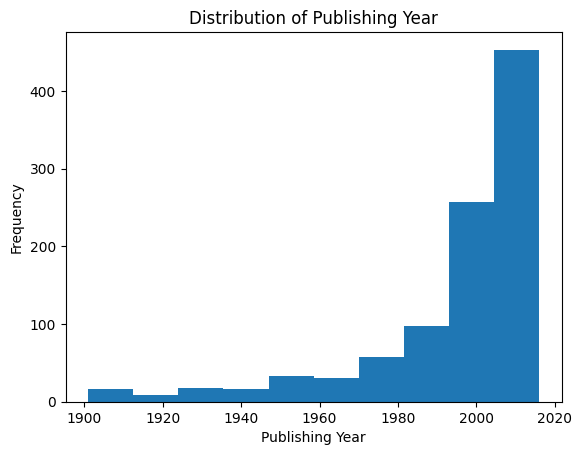

In [10]:
plt.hist(df["Publishing Year"])
plt.xlabel("Publishing Year")
plt.ylabel("Frequency")
plt.title("Distribution of Publishing Year")
plt.show()


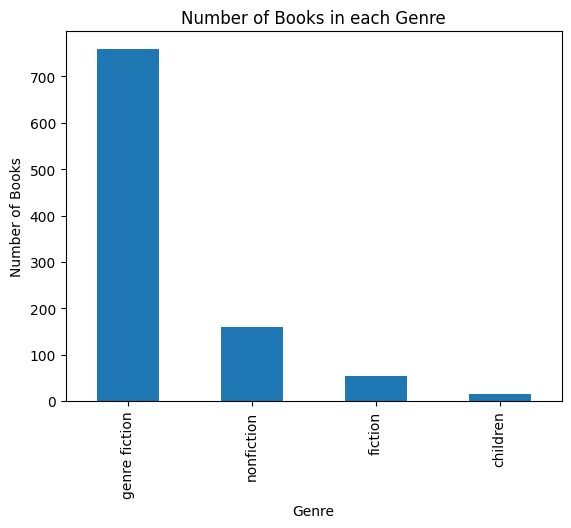

In [11]:
df["genre"].value_counts().plot(kind = "bar")
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.title("Number of Books in each Genre")
plt.show()

In [16]:
df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending = False)

,Book_average_rating
Author,
Bill Watterson,4.650000
"Bill Watterson, G.B. Trudeau",4.610000
J.R.R. Tolkien,4.590000
George R.R. Martin,4.560000
Sarah J. Maas,4.526000
...,...
Chetan Bhagat,3.273333
Audrey Niffenegger,3.230000
"Herman Koch, Sam Garrett",3.220000


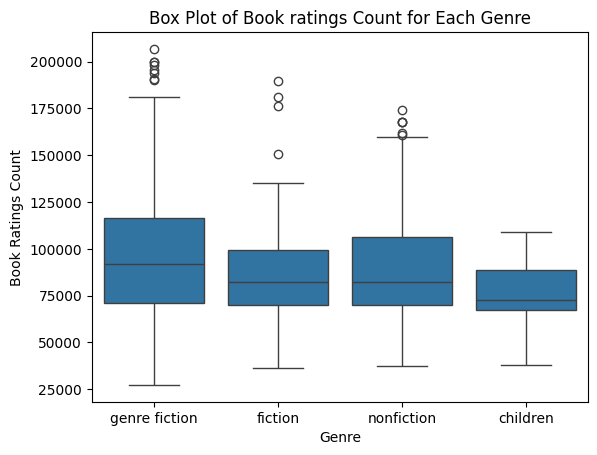

In [18]:
sns.boxplot(x = "genre", y = "Book_ratings_count", data = df)
plt.xlabel("Genre")
plt.ylabel("Book Ratings Count")
plt.title("Box Plot of Book ratings Count for Each Genre")
plt.show()

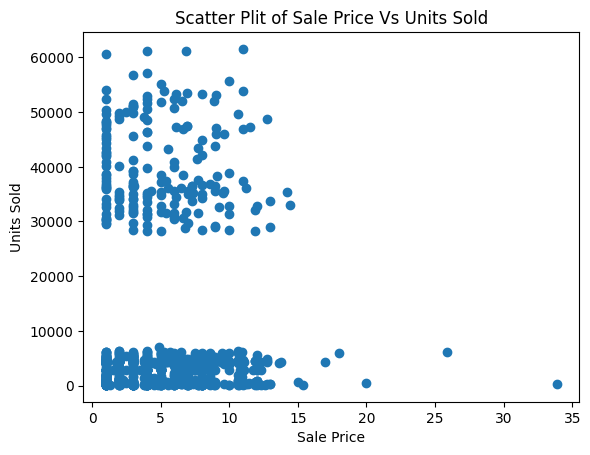

In [20]:
plt.scatter(df["sale price"], df["units sold"])
plt.xlabel("Sale Price")
plt.ylabel("Units Sold")
plt.title("Scatter Plit of Sale Price Vs Units Sold")
plt.show()

In [23]:
language_counts = df ["language_code"].value_counts()

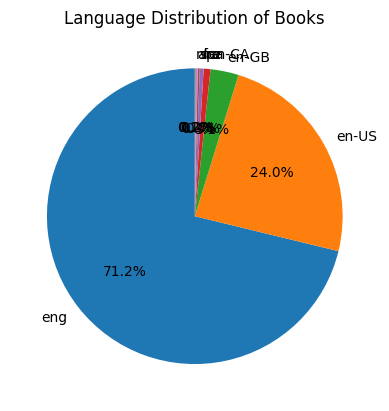

In [26]:
plt.pie(language_counts, labels = language_counts.index, startangle = 90, autopct = "%1.1f%%")
plt.title("Language Distribution of Books")
plt.show()

In [30]:
df.columns

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

In [32]:
df.groupby("Publisher ")["publisher revenue"].sum().sort_values(ascending = False)

,publisher revenue
Publisher,
Penguin Group (USA) LLC,191581.104
Random House LLC,174956.244
"Amazon Digital Services, Inc.",141767.772
HarperCollins Publishers,121769.814
Hachette Book Group,107410.968
Simon and Schuster Digital Sales Inc,46858.206
Macmillan,31249.830
HarperCollins Publishing,2830.806
HarperCollins Christian Publishing,2135.670


In [36]:
df.groupby("Author_Rating")["Book_ratings_count"].mean().sort_values(ascending = False).max()

101400.27256944444

In [38]:
df.groupby("language_code").size().sort_values(ascending = False)

,0
language_code,
eng,670
en-US,226
en-GB,29
en-CA,7
fre,4
ara,2
spa,2
nl,1


In [41]:
df.groupby("Author_Rating")["Book_ratings_count"].var()

,Book_ratings_count
Author_Rating,
Excellent,4.419857e+08
Famous,1.227555e+09
Intermediate,1.170331e+09
Novice,9.523157e+08


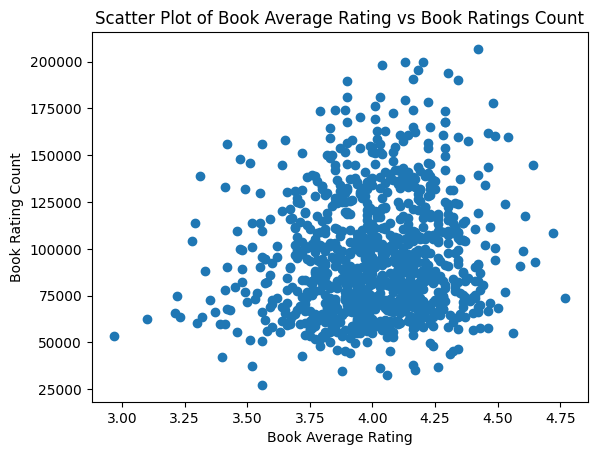

In [42]:
plt.scatter(df["Book_average_rating"], df["Book_ratings_count"])
plt.xlabel("Book Average Rating")
plt.ylabel("Book Rating Count")
plt.title("Scatter Plot of Book Average Rating vs Book Ratings Count")
plt.show()


In [43]:
total_gross_sales_by_author = df.groupby("Author")["gross sales"].sum()

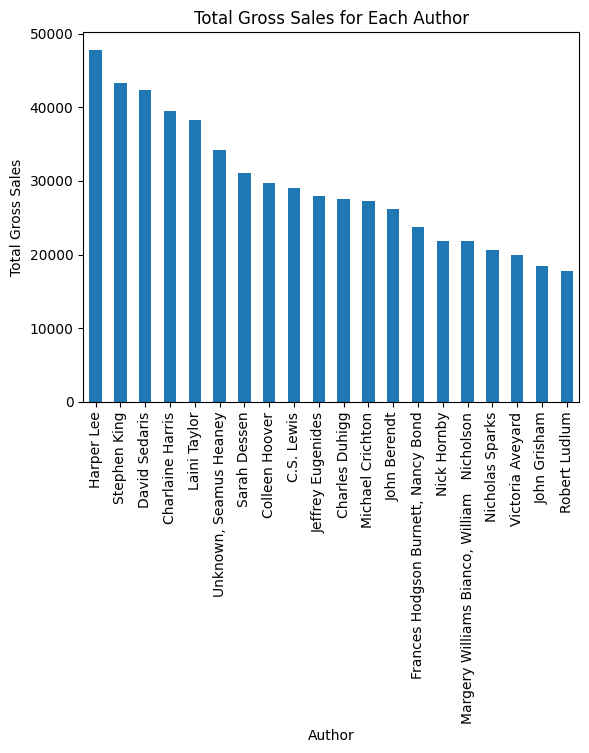

In [51]:
total_gross_sales_by_author.sort_values(ascending = False).head(20).plot(kind = 'bar')
plt.xlabel("Author")
plt.ylabel("Total Gross Sales")
plt.title("Total Gross Sales for Each Author")
plt.show()

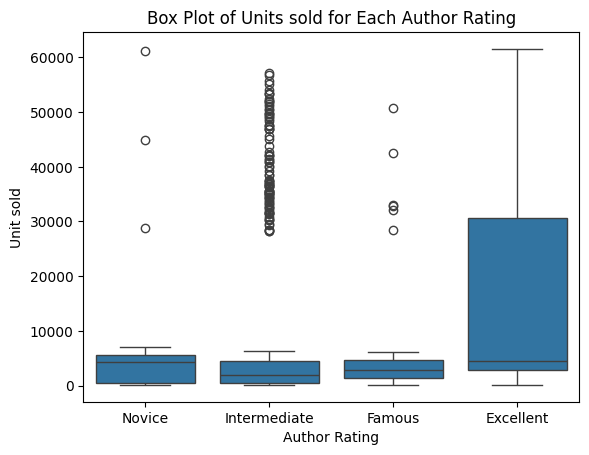

In [53]:
sns.boxplot(x="Author_Rating", y = "units sold", data = df)
plt.xlabel("Author Rating")
plt.ylabel("Unit sold")
plt.title("Box Plot of Units sold for Each Author Rating")
plt.show()

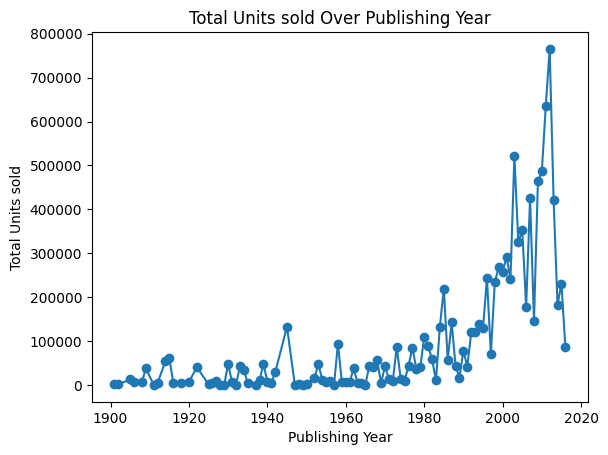

In [54]:
df.groupby("Publishing Year")["units sold"].sum().plot(kind = "line", marker = 'o')
plt.xlabel("Publishing Year")
plt.ylabel("Total Units sold")
plt.title("Total Units sold Over Publishing Year")
plt.show()